In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
plt.style.use("seaborn")

#import warnings
# warnings.filterwarnings("ignore")

144
0.43902439024390244


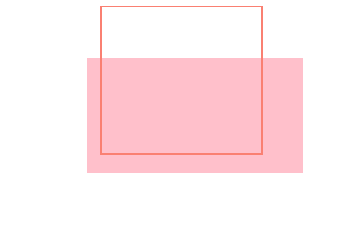

In [2]:
class Rectangle:
    def __init__(self, rect):
         self.x1, self.y1, self.x2, self.y2 = rect
         
class Overlap:
    def __init__(self, rec1=[1,1,1,1], rec2=[2,2,2,2]):
        self.rec1, self.rec2 = Rectangle(rec1), Rectangle(rec2)
        self.max_x1 = max(self.rec1.x1, self.rec2.x1)
        self.max_y1 = max(self.rec1.y1, self.rec2.y1)
        self.min_x2 = min(self.rec1.x2, self.rec2.x2)
        self.min_y2 = min(self.rec1.y2, self.rec2.y2)
        self.max_value = max(self.max_x1, self.max_y1)+10

    def rectangle_plot(self, rec, angle=0, edgecolor='red', facecolor='none', lw=4):
        xy = (rec.x1, rec.y1)
        height = abs(rec.x1 - rec.x2)
        width = abs(rec.y1 - rec.y2)
        return matplotlib.patches.Rectangle(
            xy, 
            width, 
            height, 
            angle = angle,
            edgecolor = edgecolor,
            facecolor = facecolor,
            lw = lw,
            fill=True,
        )

    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
        #ax.set_facecolor('xkcd:salmon')
        ax.set_facecolor((1.0, 1.0, 1.0))
        
        # compare area: max aream min_area
        ax.add_patch(self.rectangle_plot(self.rec1, edgecolor='pink', facecolor='pink', lw=2))
        ax.add_patch(self.rectangle_plot(self.rec2, edgecolor='salmon', facecolor='none', lw=2))
        plt.xlim([-5, 20])
        plt.ylim([-5, 20])
        plt.axis('off')
        
    @property
    def intersection(self):
        """
        Calculates the intersection between two rectangles.
        """
        return max(0, self.min_x2 - self.max_x1 ) * max(0, self.min_y2 - self.max_y1)

    def area(self, rec):
        """
        Calculates the surface area.
        """
        return (rec.x2 - rec.x1 + 1) * (rec.y2 - rec.y1 + 1)

    @property
    def iou(self):
        """
        Calculates the intersection over unioun between two rectangles.
        """
        #intersection = self.intersection()
        area1, area2 = self.area(self.rec1), self.area(self.rec2)
        iou = self.intersection / float(area1 + area2 - self.intersection)
        # return the intersection over union value
        return iou

obj = Overlap(rec1=[1,1,14,17], rec2=[2,3,19,15])
print(obj.intersection)
print(obj.iou)
obj.plot()